In [41]:
from bertviz.pytorch_transformers_attn import BertForSequenceClassification, BertTokenizer
from bertviz.attention import get_attention
model_type = "bert_fineturn"
#pretrain_model = "../local/model_bert_90.65"
pretrain_model = "bert-base-uncased"
MODEL_CLASSES = {
    'bert': (BertForSequenceClassification, BertTokenizer)
}
model_class, tokenizer_class = MODEL_CLASSES["bert"]
tokenizer = tokenizer_class.from_pretrained("bert-base-uncased")
model = model_class.from_pretrained(pretrain_model)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   

In [42]:
import numpy as np
sentence_a = "Does anybody here know how to stop a payment for a cheque issued? CBQ, QNB, etc..."
sentence_b = "If someone writes a cheque knowing that there are no funds to cover it, they will be arrested. This is why the bank asks for a police report; mostly for their protection, but a little bit for yours too. \"You can't tell which way the train went by looking at the tracks"
sentence_b = " ".join(sentence_b.split()[0:50])
attn_data = get_attention(model, model_type, tokenizer, sentence_a, sentence_b)
ab = np.array(attn_data['ab']['attn'][0])
print(ab.shape)
import numpy as np
a = [["CLS"]+tokenizer.tokenize(sentence_a)+["SEP"]]
q = [tokenizer.tokenize(sentence_b)+["SEP"]]
print(a)
print(q)

(1, 27, 60)
[['CLS', 'does', 'anybody', 'here', 'know', 'how', 'to', 'stop', 'a', 'payment', 'for', 'a', 'che', '##que', 'issued', '?', 'cb', '##q', ',', 'q', '##nb', ',', 'etc', '.', '.', '.', 'SEP']]
[['if', 'someone', 'writes', 'a', 'che', '##que', 'knowing', 'that', 'there', 'are', 'no', 'funds', 'to', 'cover', 'it', ',', 'they', 'will', 'be', 'arrested', '.', 'this', 'is', 'why', 'the', 'bank', 'asks', 'for', 'a', 'police', 'report', ';', 'mostly', 'for', 'their', 'protection', ',', 'but', 'a', 'little', 'bit', 'for', 'yours', 'too', '.', '"', 'you', 'can', "'", 't', 'tell', 'which', 'way', 'the', 'train', 'went', 'by', 'looking', 'at', 'SEP']]


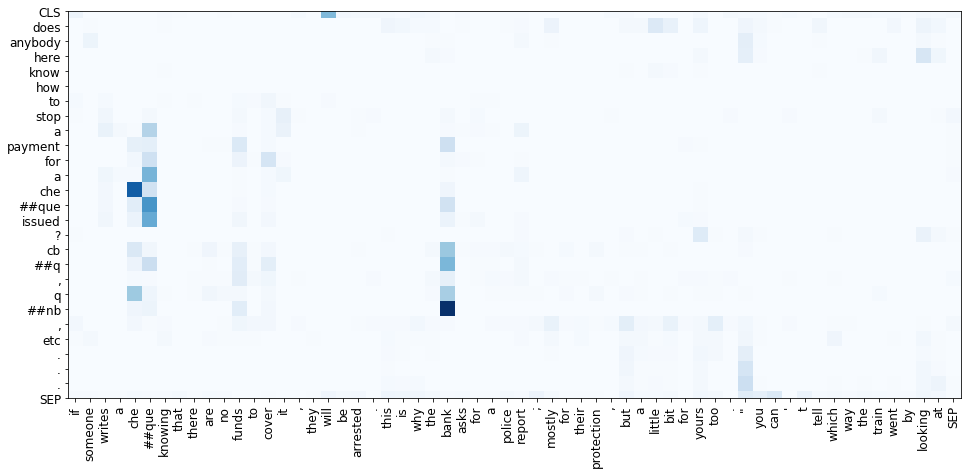

In [43]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(16,10))
plt.imshow(ab[0,:len(a[0]),:len(q[0])], cmap='Blues')
plt.xticks(np.arange(len(q[0])), q[0],  rotation='vertical')
plt.yticks(np.arange(len(a[0])), a[0])
#plt.colorbar();
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()
